# Midterm Project
## Waleed Khan

### You start to manage 5 million dollars fund on Jan 02, 2018

#### You have a strategy to manage the fund.

On Jan 02 2018, you split the \\$5m into 5 \\$1m, and use them to buy 5 stocks from the 10 stocks. You decided to spend \\$1m on each of ['IBM', 'MSFT', 'GOOG', 'AAPL', 'AMZN'] respectively and keep the rest cash into a zero-interest cash account. On Jan 02 2018, your mark to market value (MTM) is \$5m if combining all stocks value and cash. Your holdings of stocks and cach account is your portfolio.

In [1]:
library(dplyr)
#Read Data
ibmData=read.csv("ibm.csv")
msftData=read.csv("msft.csv")
googData=read.csv("goog.csv")
aaplData=read.csv("aapl.csv")
amznData=read.csv("amzn.csv")
fbData=read.csv("fb.csv")
nflxData=read.csv("nflx.csv")
tslaData=read.csv("tsla.csv")
orclData=read.csv("orcl.csv")
sapData=read.csv("sap.csv")


Attaching package: ‘dplyr’

The following objects are masked from ‘package:stats’:

    filter, lag

The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union



### ibm

In [2]:
ibmTrimmed = ibmData[,c('Close','Adj.Close')]
names(ibmTrimmed)[1] = "ibm_Close"
names(ibmTrimmed)[2] = "ibm_Adj.Close"

### msft

In [3]:
msftTrimmed = msftData[,c('Close','Adj.Close')]
names(msftTrimmed)[1] = "msft_Close"
names(msftTrimmed)[2] = "msft_Adj.Close"

### goog

In [4]:
googTrimmed = googData[,c('Close','Adj.Close')]
names(googTrimmed)[1] = "goog_Close"
names(googTrimmed)[2] = "goog_Adj.Close"

### aapl

In [5]:
aaplTrimmed = aaplData[,c('Close','Adj.Close')]
names(aaplTrimmed)[1] = "aapl_Close"
names(aaplTrimmed)[2] = "aapl_Adj.Close"

### amzn

In [6]:
amznTrimmed = amznData[,c('Close','Adj.Close')]
names(amznTrimmed)[1] = "amzn_Close"
names(amznTrimmed)[2] = "amzn_Adj.Close"

### fb

In [7]:
fbTrimmed = fbData[,c('Close','Adj.Close')]
names(fbTrimmed)[1] = "fb_Close"
names(fbTrimmed)[2] = "fb_Adj.Close"

### nflx

In [8]:
nflxTrimmed = nflxData[,c('Close','Adj.Close')]
names(nflxTrimmed)[1] = "nflx_Close"
names(nflxTrimmed)[2] = "nflx_Adj.Close"

### tsla

In [9]:
tslaTrimmed = tslaData[,c('Close','Adj.Close')]
names(tslaTrimmed)[1] = "tsla_Close"
names(tslaTrimmed)[2] = "tsla_Adj.Close"

### orcl

In [10]:
orclTrimmed = orclData[,c('Close','Adj.Close')]
names(orclTrimmed)[1] = "orcl_Close"
names(orclTrimmed)[2] = "orcl_Adj.Close"

### sap

In [11]:
sapTrimmed = sapData[,c('Close','Adj.Close')]
names(sapTrimmed)[1] = "sap_Close"
names(sapTrimmed)[2] = "sap_Adj.Close"

## Combining Data Frames

In [12]:
# merge(ibmTrimmed,msftTrimmed,googTrimmed,aaplTrimmed,amznTrimmed,fbTrimmed,nflxTrimmed,tslaTrimmed,orclTrimmed,sapTrimmed)
universe = cbind(ibmData['Date'],ibmTrimmed,msftTrimmed,googTrimmed,aaplTrimmed,amznTrimmed,fbTrimmed,nflxTrimmed,tslaTrimmed,orclTrimmed,sapTrimmed)
head(universe)

Date,ibm_Close,ibm_Adj.Close,msft_Close,msft_Adj.Close,goog_Close,goog_Adj.Close,aapl_Close,aapl_Adj.Close,amzn_Close,...,fb_Close,fb_Adj.Close,nflx_Close,nflx_Adj.Close,tsla_Close,tsla_Adj.Close,orcl_Close,orcl_Adj.Close,sap_Close,sap_Adj.Close
2018-01-02,154.25,137.5211,85.95,82.79900,1065.00,1065.00,172.26,166.3537,1189.01,...,181.42,181.42,201.07,201.07,320.53,320.53,46.63,44.71024,112.39,107.6336
2018-01-03,158.49,141.3013,86.35,83.18433,1082.48,1082.48,172.23,166.3247,1204.20,...,184.67,184.67,205.05,205.05,317.25,317.25,47.71,45.74577,113.31,108.5147
2018-01-04,161.70,144.1631,87.11,83.91647,1086.40,1086.40,173.03,167.0973,1209.59,...,184.33,184.33,205.63,205.63,314.62,314.62,48.18,46.19643,115.05,110.1811
2018-01-05,162.49,144.8675,88.19,84.95689,1102.23,1102.23,175.00,168.9997,1229.14,...,186.85,186.85,209.99,209.99,316.58,316.58,48.47,46.47449,116.33,111.4069
2018-01-08,163.47,145.7412,88.28,85.04357,1106.94,1106.94,174.35,168.3720,1246.87,...,188.28,188.28,212.05,212.05,336.41,336.41,48.98,46.96349,114.80,109.9416
2018-01-09,163.83,146.0621,88.22,84.98579,1106.26,1106.26,174.33,168.3527,1252.70,...,187.87,187.87,209.31,209.31,333.69,333.69,49.06,47.22339,114.16,109.3287


## Calculating Initial Portfolio

In [13]:
initialize <- function(){
    
    remaining_cash <<- 0 #We will be spending all of our money to start the portfolio
    mtm_series <<- c(5000000) #We begin with a value of $5M in our portfolio
    
    ### Buy initial portfolio stocks on 1st business day (Jan 2, 2018):
    
    ### ibm
    ibm_Close_Prev <<- universe[1,'ibm_Close']
    ibm_Adj_Close_Prev <<- universe[1,'ibm_Adj.Close']
    remaining_ibm_cash <<- 1000000 %% ibm_Close_Prev
    total_ibm_shares <<- floor(1000000 / ibm_Close_Prev)
#     cat("\nTotal ibm shares: ")
#     cat(total_ibm_shares)
    remaining_cash <<- remaining_cash + remaining_ibm_cash

    ### msft
    msft_Close_Prev <<- universe[1,'msft_Close']
    msft_Adj_Close_Prev <<- universe[1,'msft_Adj.Close']
    remaining_msft_cash <<- 1000000 %% msft_Close_Prev
    total_msft_shares <<- floor(1000000 / msft_Close_Prev)
#     cat("\nTotal msft shares: ")
#     cat(total_msft_shares)
    remaining_cash <<- remaining_cash + remaining_msft_cash

    #goog
    goog_Close_Prev <<- universe[1,'goog_Close']
    goog_Adj_Close_Prev <<- universe[1,'goog_Adj.Close']
    remaining_goog_cash <<- 1000000 %% goog_Close_Prev
    total_goog_shares <<- floor(1000000 / goog_Close_Prev)
#     cat("\nTotal goog shares: ")
#     cat(total_goog_shares)
    remaining_cash <<- remaining_cash + remaining_goog_cash

    #aapl
    aapl_Close_Prev <<- universe[1,'aapl_Close']
    aapl_Adj_Close_Prev <<- universe[1,'aapl_Adj.Close']
    remaining_aapl_cash <<- 1000000 %% aapl_Close_Prev
    total_aapl_shares <<- floor(1000000 / aapl_Close_Prev)
#     cat("\nTotal aapl shares: ")
#     cat(total_aapl_shares)
    remaining_cash <<- remaining_cash + remaining_aapl_cash

    #amzn
    amzn_Close_Prev <<- universe[1,'amzn_Close']
    amzn_Adj_Close_Prev <<- universe[1,'amzn_Adj.Close']
    remaining_amzn_cash <<- 1000000 %% amzn_Close_Prev
    total_amzn_shares <<- floor(1000000 / amzn_Close_Prev)
#     cat("\nTotal amzn shares: ")
#     cat(total_amzn_shares)
    remaining_cash <<- remaining_cash + remaining_amzn_cash
    
    #Save close prices for non-portfolio stocks on 1st business day (Jan 2, 2018):
    fb_Close_Prev <<- universe[1,'fb_Close']
    fb_Adj_Close_Prev <<- universe[1,'fb_Adj.Close']
    total_fb_shares <<- 0

    nflx_Close_Prev <<- universe[1,'nflx_Close']
    nflx_Adj_Close_Prev <<- universe[1,'nflx_Adj.Close']
    total_nflx_shares <<- 0

    tsla_Close_Prev <<- universe[1,'tsla_Close']
    tsla_Adj_Close_Prev <<- universe[1,'tsla_Adj.Close']
    total_tsla_shares <<- 0

    orcl_Close_Prev <<- universe[1,'orcl_Close']
    orcl_Adj_Close_Prev <<- universe[1,'orcl_Adj.Close']
    total_orcl_shares <<- 0

    sap_Close_Prev <<- universe[1,'sap_Close']
    sap_Adj_Close_Prev <<- universe[1,'sap_Adj.Close']
    total_sap_shares <<- 0
}

## Expected output when print statements are uncommented:
# Total ibm shares: 6482
# Total msft shares: 11634
# Total goog shares: 938
# Total aapl shares: 5805
# Total amzn shares: 841

# Rebalancing

## n Days of Rebalancing LOW Strategy:
##### (Sell every n days and buy the 5 lowest stocks whose "Adj Close" prices dropped the most in terms of percentage )

## n Days of Rebalancing HIGH Strategy:
##### (Sell every n days and buy the 5 highest stocks whose "Adj Close" prices increased the most in terms of percentage)

### Either can be done below, by simply giving the 'lowStrategy' parameter as TRUE for LOW or FALSE for HIGH

In [14]:
# Rebalancing:
rebalance <- function(dayNumber, lowStrategy, dayInterval) {
    
    low_strategy = lowStrategy #Tweakable boolean for the investment strategy
    day_interval = dayInterval  #Tweakable value for how often you want to update the portfolio
    
    # First, Get the Close/Adj.Close as well as the % change in Adj. Close for each stock (for this dayNumber) 
    ibm_AdjClose_String <<- 'ibm_Adj.Close'
    ibm_Close_String <<- 'ibm_Close'
    ibm_Adj_Close <<- universe[dayNumber,ibm_AdjClose_String]
    ibm_Close <<- universe[dayNumber,ibm_Close_String]
    ibm_Change <<- (ibm_Adj_Close - ibm_Adj_Close_Prev)/(ibm_Adj_Close_Prev)
    
    msft_AdjClose_String <<- 'msft_Adj.Close'
    msft_Close_String <<- 'msft_Close'
    msft_Adj_Close <<- universe[dayNumber,msft_AdjClose_String]
    msft_Close <<- universe[dayNumber,msft_Close_String]
    msft_Change <<- (msft_Adj_Close - msft_Adj_Close_Prev)/(msft_Adj_Close_Prev)
    
    goog_AdjClose_String <<- 'goog_Adj.Close'
    goog_Close_String <<- 'goog_Close'
    goog_Adj_Close <<- universe[dayNumber,goog_AdjClose_String]
    goog_Close <<- universe[dayNumber,goog_Close_String]
    goog_Change <<- (goog_Adj_Close - goog_Adj_Close_Prev)/(goog_Adj_Close_Prev)
    
    aapl_AdjClose_String <<- 'aapl_Adj.Close'
    aapl_Close_String <<- 'aapl_Close'
    aapl_Adj_Close <<- universe[dayNumber,aapl_AdjClose_String]
    aapl_Close <<- universe[dayNumber,aapl_Close_String]
    aapl_Change <<- (aapl_Adj_Close - aapl_Adj_Close_Prev)/(aapl_Adj_Close_Prev)
    
    amzn_AdjClose_String <<- 'amzn_Adj.Close'
    amzn_Close_String <<- 'amzn_Close'
    amzn_Adj_Close <<- universe[dayNumber,amzn_AdjClose_String]
    amzn_Close <<- universe[dayNumber,amzn_Close_String]
    amzn_Change <<- (amzn_Adj_Close - amzn_Adj_Close_Prev)/(amzn_Adj_Close_Prev)
    
    fb_AdjClose_String <<- 'fb_Adj.Close'
    fb_Close_String <<- 'fb_Close'
    fb_Adj_Close <<- universe[dayNumber,fb_AdjClose_String]
    fb_Close <<- universe[dayNumber,fb_Close_String]
    fb_Change <<- (fb_Adj_Close - fb_Adj_Close_Prev)/(fb_Adj_Close_Prev)
    
    nflx_AdjClose_String <<- 'nflx_Adj.Close'
    nflx_Close_String <<- 'nflx_Close'
    nflx_Adj_Close <<- universe[dayNumber,nflx_AdjClose_String]
    nflx_Close <<- universe[dayNumber,nflx_Close_String]
    nflx_Change <<- (nflx_Adj_Close - nflx_Adj_Close_Prev)/(nflx_Adj_Close_Prev)
    
    tsla_AdjClose_String <<- 'tsla_Adj.Close'
    tsla_Close_String <<- 'tsla_Close'
    tsla_Adj_Close <<- universe[dayNumber,tsla_AdjClose_String]
    tsla_Close <<- universe[dayNumber,tsla_Close_String]
    tsla_Change <<- (tsla_Adj_Close - tsla_Adj_Close_Prev)/(tsla_Adj_Close_Prev)
    
    orcl_AdjClose_String <<- 'orcl_Adj.Close'
    orcl_Close_String <<- 'orcl_Close'
    orcl_Adj_Close <<- universe[dayNumber,orcl_AdjClose_String]
    orcl_Close <<- universe[dayNumber,orcl_Close_String]
    orcl_Change <<- (orcl_Adj_Close - orcl_Adj_Close_Prev)/(orcl_Adj_Close_Prev)
    
    sap_AdjClose_String <<- 'sap_Adj.Close'
    sap_Close_String <<- 'sap_Close'
    sap_Adj_Close <<- universe[dayNumber,sap_AdjClose_String]
    sap_Close <<- universe[dayNumber,sap_Close_String]
    sap_Change <<- (sap_Adj_Close - sap_Adj_Close_Prev)/(sap_Adj_Close_Prev)
    
    current_mtm <<- 0
    
    if(total_ibm_shares>0){
        #sell shares if it is the correct day to do so
        if(((dayNumber - 1) %% day_interval)==0){
            remaining_cash <<- remaining_cash + (total_ibm_shares*ibm_Close)
            total_ibm_shares <<- 0
        }
        #add stock value to mtm
        else{
            current_mtm <<- current_mtm + (total_ibm_shares*ibm_Close)
        }
    }
    if(total_msft_shares>0){
        #sell shares if it is the correct day to do so
        if(((dayNumber - 1) %% day_interval)==0){
            remaining_cash <<- remaining_cash + (total_msft_shares*msft_Close)
            total_msft_shares <<- 0
        }
        #add stock value to mtm
        else{
            current_mtm <<- current_mtm + (total_msft_shares*msft_Close)
        }
    }
    if(total_goog_shares>0){
        #sell shares if it is the correct day to do so
        if(((dayNumber - 1) %% day_interval)==0){
            remaining_cash <<- remaining_cash + (total_goog_shares*goog_Close)
            total_goog_shares <<- 0
        }
        #add to mtm
        else{
            current_mtm <<- current_mtm + (total_goog_shares*goog_Close)
        }
    }
    if(total_aapl_shares>0){
        #sell shares if it is the correct day to do so
        if(((dayNumber - 1) %% day_interval)==0){
            remaining_cash <<- remaining_cash + (total_aapl_shares*aapl_Close)
            total_aapl_shares <<- 0
        }
        #add to mtm
        else{
            current_mtm <<- current_mtm + (total_aapl_shares*aapl_Close)
        }
    }
    if(total_amzn_shares>0){
        #sell shares if it is the correct day to do so
        if(((dayNumber - 1) %% day_interval)==0){
            remaining_cash <<- remaining_cash + (total_amzn_shares*amzn_Close)
            total_amzn_shares <<- 0
        }
        #add to mtm
        else{
            current_mtm <<- current_mtm + (total_amzn_shares*amzn_Close)
        }
    }
    if(total_fb_shares>0){
        #sell shares if it is the correct day to do so
        if(((dayNumber - 1) %% day_interval)==0){
            remaining_cash <<- remaining_cash + (total_fb_shares*fb_Close)
            total_fb_shares <<- 0
        }
        #add to mtm
        else{
            current_mtm <<- current_mtm + (total_fb_shares*fb_Close)
        }
    }
    if(total_nflx_shares>0){
        #sell shares if it is the correct day to do so
        if(((dayNumber - 1) %% day_interval)==0){
            remaining_cash <<- remaining_cash + (total_nflx_shares*nflx_Close)
            total_nflx_shares <<- 0
        }
        #add to mtm
        else{
            current_mtm <<- current_mtm + (total_nflx_shares*nflx_Close)
        }
    }
    if(total_tsla_shares>0){
        #sell shares if it is the correct day to do so
        if(((dayNumber - 1) %% day_interval)==0){
            remaining_cash <<- remaining_cash + (total_tsla_shares*tsla_Close)
            total_tsla_shares <<- 0
        }
        #add to mtm
        else{
            current_mtm <<- current_mtm + (total_tsla_shares*tsla_Close)
        }
    }
    if(total_orcl_shares>0){
        #sell shares if it is the correct day to do so
        if(((dayNumber - 1) %% day_interval)==0){
            remaining_cash <<- remaining_cash + (total_orcl_shares*orcl_Close)
            total_orcl_shares <<- 0
        }
        #add to mtm
        else{
            current_mtm <<- current_mtm + (total_orcl_shares*orcl_Close)
        }
    }
    if(total_sap_shares>0){
        #sell shares if it is the correct day to do so
        if(((dayNumber - 1) %% day_interval)==0){
            remaining_cash <<- remaining_cash + (total_sap_shares*sap_Close)
            total_sap_shares <<- 0
        }
        #add to mtm
        else{
            current_mtm <<- current_mtm + (total_sap_shares*sap_Close)
        }
    }
    current_mtm <<- current_mtm + remaining_cash
    mtm_series <<- c(mtm_series, current_mtm) #Add today's mtm to the mtm series
    
    #Buy 5 different company's stocks if it is the correct day to do so
    if((dayNumber - 1) %% day_interval==0){
        budget <<- remaining_cash / 5
        changes_in_Adj_Close <<- c(ibm_Change,msft_Change,goog_Change,aapl_Change,amzn_Change,
                                   fb_Change,nflx_Change,tsla_Change,orcl_Change, sap_Change)
        #This will be the changes ordered from most negative to most positive
        ordered_changes <<- order(changes_in_Adj_Close) 
        #If we are doing a low strategy, we pick 5 most negative performing companies:
        if(low_strategy==TRUE){ 
            ordered_changes <<- head(ordered_changes,n=5) #This will be the first 5 of the indexes (the first 5)
        }
        #If we are doing a high strategy, we pick 5 most positive performing companies (the last 5):
        else{
            ordered_changes <<- tail(ordered_changes,n=5)
        }
        
        
        #values of indexes and their respective stocks:
        #1<<-ibm, 2<<-msft, 3<<-goog, 4<<-aapl, 5<<-amzn, #6<<-fb, #7<<-nflx, #8<<-tsla, #9<<-orcl, #10<<-sap
        
        #buy ibm
        if(is.element(1,ordered_changes)){
            bought_shares <<- floor(budget/ibm_Close)
            shares_cost <<- ibm_Close*bought_shares
            remaining_cash <<- remaining_cash - shares_cost
            total_ibm_shares <<- total_ibm_shares + bought_shares
        }
        #buy msft
        if(is.element(2,ordered_changes)){
            bought_shares <<- floor(budget/msft_Close)
            shares_cost <<- msft_Close*bought_shares
            remaining_cash <<- remaining_cash - shares_cost
            total_msft_shares <<- total_msft_shares + bought_shares
        }
        #buy goog
        if(is.element(3,ordered_changes)){
            bought_shares <<- floor(budget/goog_Close)
            shares_cost <<- goog_Close*bought_shares
            remaining_cash <<- remaining_cash - shares_cost
            total_goog_shares <<- total_goog_shares + bought_shares
        }
        #buy aapl
        if(is.element(4,ordered_changes)){
            bought_shares <<- floor(budget/aapl_Close)
            shares_cost <<- aapl_Close*bought_shares
            remaining_cash <<- remaining_cash - shares_cost
            total_aapl_shares <<- total_aapl_shares + bought_shares
        }
        #buy amzn
        if(is.element(5,ordered_changes)){
            bought_shares <<- floor(budget/amzn_Close)
            shares_cost <<- amzn_Close*bought_shares
            remaining_cash <<- remaining_cash - shares_cost
            total_amzn_shares <<- total_amzn_shares + bought_shares
        }
        #buy fb
        if(is.element(6,ordered_changes)){
            bought_shares <<- floor(budget/fb_Close)
            shares_cost <<- fb_Close*bought_shares
            remaining_cash <<- remaining_cash - shares_cost
            total_fb_shares <<- total_fb_shares + bought_shares
        }
        #buy nflx
        if(is.element(7,ordered_changes)){
            bought_shares <<- floor(budget/nflx_Close)
            shares_cost <<- nflx_Close*bought_shares
            remaining_cash <<- remaining_cash - shares_cost
            total_nflx_shares <<- total_nflx_shares + bought_shares
        }
        #buy tsla
        if(is.element(8,ordered_changes)){
            bought_shares <<- floor(budget/tsla_Close)
            shares_cost <<- tsla_Close*bought_shares
            remaining_cash <<- remaining_cash - shares_cost
            total_tsla_shares <<- total_tsla_shares + bought_shares
        }
        #buy orcl
        if(is.element(9,ordered_changes)){
            bought_shares <<- floor(budget/orcl_Close)
            shares_cost <<- orcl_Close*bought_shares
            remaining_cash <<- remaining_cash - shares_cost
            total_orcl_shares <<- total_orcl_shares + bought_shares
        }
        #buy sap
        if(is.element(10,ordered_changes)){
            bought_shares <<- floor(budget/sap_Close)
            shares_cost <<- sap_Close*bought_shares
            remaining_cash <<- remaining_cash - shares_cost
            total_sap_shares <<- total_sap_shares + bought_shares 
        }
        
    }
}

## Low Strategy:


-----LOW STRATEGY:-----

Ending portfolio value: 5300083


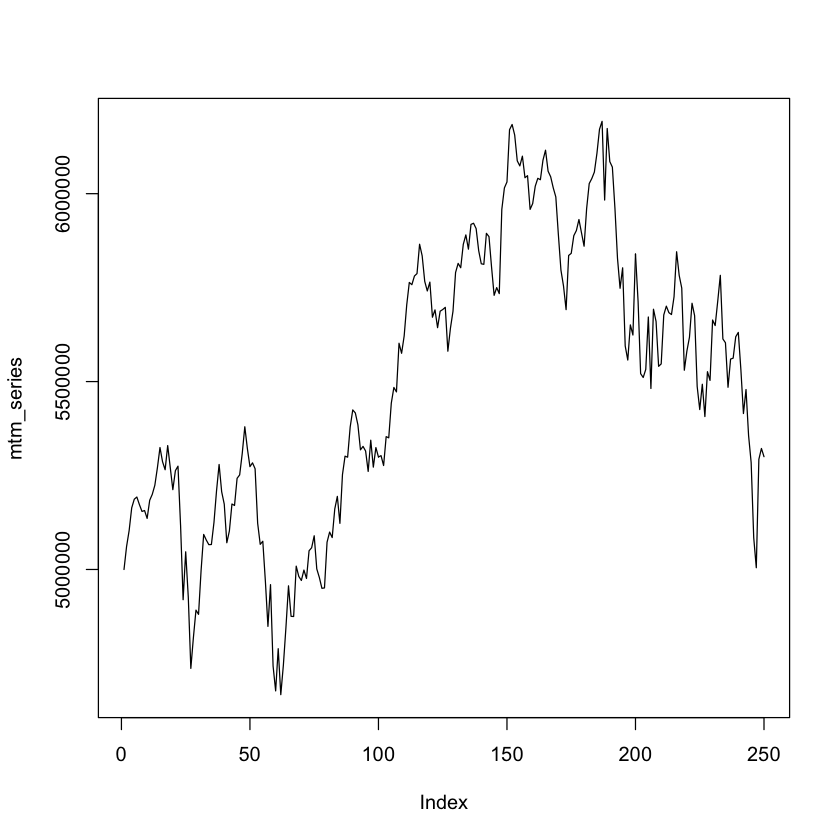

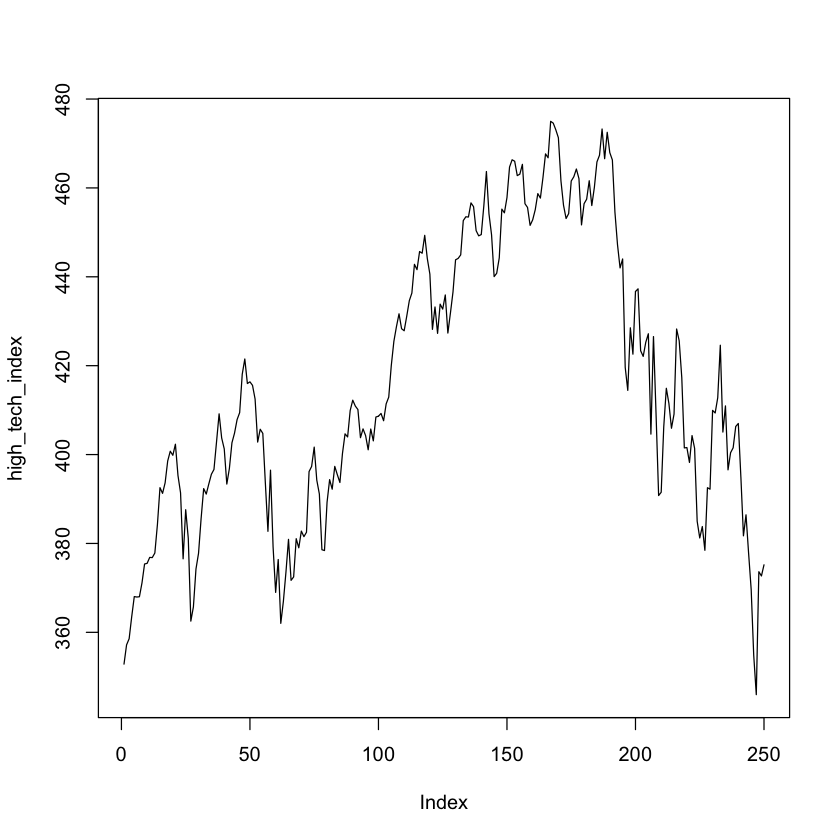

In [24]:

initialize()

x = 2:length(universe[,1])
for (dayNumber in 2:length(universe[,1])) {
#     rebalance(dayNumber, TRUE, 28)
    rebalance(dayNumber, lowStrategy=TRUE, dayInterval=5)

}
cat("\n")
cat("-----LOW STRATEGY:-----")
cat("\n")
cat("\n")
cat("Ending portfolio value: ")
cat(mtm_series[length(mtm_series)])
cat("\n")
plot(mtm_series, type="l")

#Our high tech index contains the daily averages of all 10 stocks
high_tech_index = rowMeans(universe[,c('ibm_Close', 'msft_Close', 'goog_Close','aapl_Close','amzn_Close'
                              , 'fb_Close','nflx_Close','tsla_Close','orcl_Close','sap_Close')])
plot(high_tech_index, type="l")

## High Strategy


-----HIGH STRATEGY:-----

Ending portfolio value: 4741020


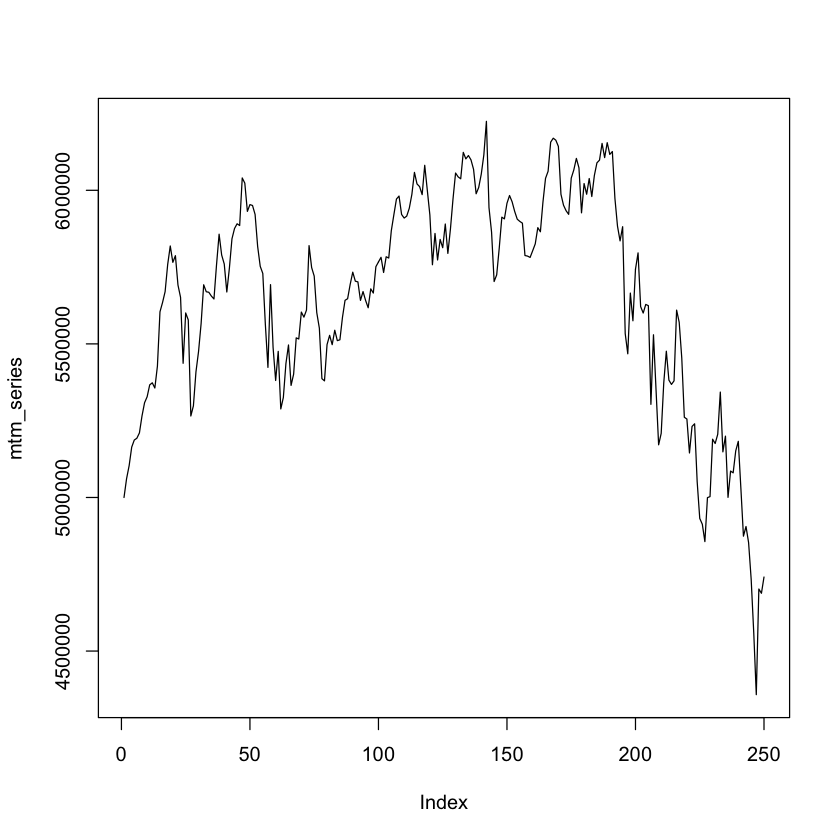

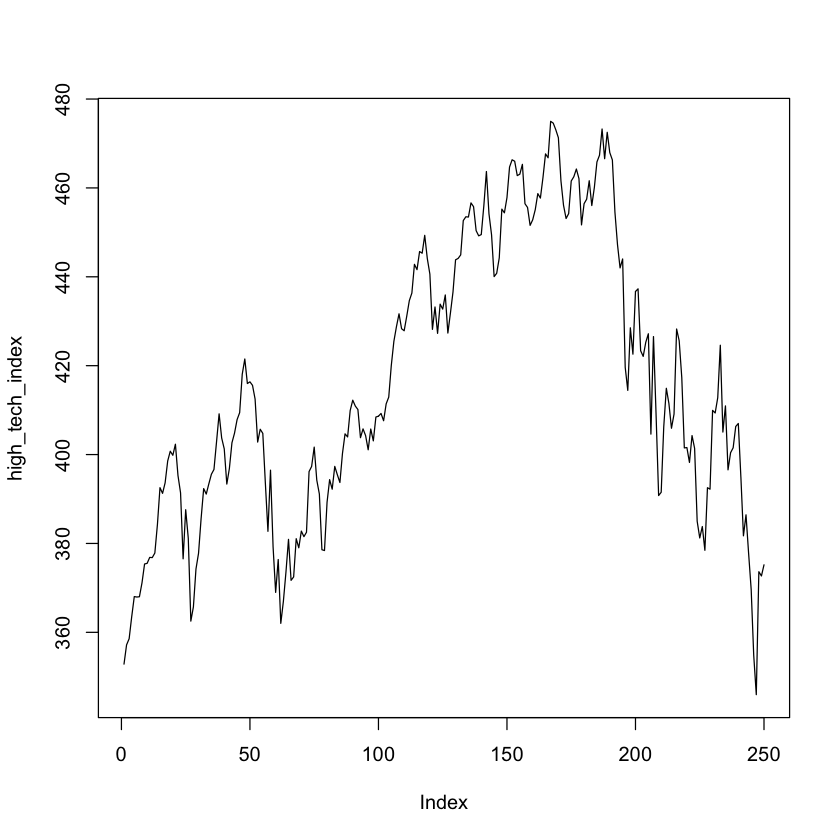

In [25]:
initialize()

x = 2:length(universe[,1])
for (dayNumber in 2:length(universe[,1])) {
    rebalance(dayNumber, lowStrategy=FALSE, dayInterval=5)

}
cat("\n")
cat("-----HIGH STRATEGY:-----")
cat("\n")
cat("\n")
cat("Ending portfolio value: ")
cat(mtm_series[length(mtm_series)])
cat("\n")
plot(mtm_series, type="l")

#Our high tech index contains the daily averages of all 10 stocks
high_tech_index = rowMeans(universe[,c('ibm_Close', 'msft_Close', 'goog_Close','aapl_Close','amzn_Close'
                              , 'fb_Close','nflx_Close','tsla_Close','orcl_Close','sap_Close')])
plot(high_tech_index, type="l")